# Forecasting Retail Store Sales

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf

In [2]:
#loading the data set
df=pd.read_csv('forecasting data.csv')

In [3]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [4]:
df.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday'], dtype='object')

In [5]:
df.tail()

,Store,Dept,Date,Weekly_Sales,IsHoliday
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False
421569,45,98,2012-10-26,1076.80,False


In [6]:
#Check the structure of data and make necessary conversions
df.dtypes

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
dtype: object

In [7]:
#converting date from object to datetime format
df['Date']=pd.to_datetime(df['Date'])

In [8]:
df['Week']=df.Date.dt.week
df['Year']=df.Date.dt.year

C:\Users\Leah\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """Entry point for launching an IPython kernel.


In [9]:
#Extracting year from Date Column
df['Year']=pd.DatetimeIndex(df['Date']).year
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Week,Year
0,1,1,2010-02-05,24924.50,False,5,2010
1,1,1,2010-02-12,46039.49,True,6,2010
2,1,1,2010-02-19,41595.55,False,7,2010
3,1,1,2010-02-26,19403.54,False,8,2010
4,1,1,2010-03-05,21827.90,False,9,2010


In [10]:
df.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Week', 'Year'], dtype='object')

In [11]:
#Extracting month from date
df['Month']=pd.DatetimeIndex(df['Date']).month
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Week,Year,Month
0,1,1,2010-02-05,24924.50,False,5,2010,2
1,1,1,2010-02-12,46039.49,True,6,2010,2
2,1,1,2010-02-19,41595.55,False,7,2010,2
3,1,1,2010-02-26,19403.54,False,8,2010,2
4,1,1,2010-03-05,21827.90,False,9,2010,3


In [12]:
df.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Week', 'Year',
       'Month'],
      dtype='object')

In [13]:

#date converted to datetime type
df.dtypes

Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                 bool
Week                     int64
Year                     int64
Month                    int64
dtype: object

In [14]:
df['Year']=pd.to_datetime(df['Year'])
df['Month']=pd.to_datetime(df['Month'])
df['Week']=pd.to_datetime(df['Week'])

In [15]:

df.dtypes

Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                 bool
Week            datetime64[ns]
Year            datetime64[ns]
Month           datetime64[ns]
dtype: object

In [16]:
#checking for duplicates in dataset
print('train_data duplicated:{}'.format(df.duplicated().sum()))
df.drop_duplicates(inplace=True)

train_data duplicated:0


In [17]:
df.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [18]:
#checking for missing values
df.isnull().any()

Store           False
Dept            False
Date            False
Weekly_Sales    False
IsHoliday       False
Week            False
Year            False
Month           False
dtype: bool

No missing values

AxesSubplot(0.125,0.125;0.775x0.755)


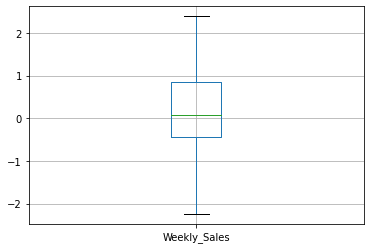

In [19]:
#checking for outliers
np.random.seed(1234)
df = pd.DataFrame(np.random.randn(47,1), columns=['Weekly_Sales'])
boxplot = df.boxplot(column=['Weekly_Sales'])
print(boxplot)

No outliers

In [20]:
#Find out the top 3 stores in each month
df_top_stores=df.groupby(by=['Month'],as_index=False)['Weekly_Sales'].sum(3)
df_top_stores.sort_values('Weekly_Sales',ascending=False)

KeyError: 'Month'

In [ ]:
#Visualizing the data
ax=df.plot(figsize=(10,6),lw=2,style='k-')

In [ ]:
df.corr()

In [ ]:
# Divide the data into training and validation. Consider 2010, 2011 data as training and 2012 as validation
from sklearn.model_selection import train_test_split
X=df.drop('Weekly_Sales',axis=1)
y=df['Weekly_Sales']
#splitting
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
#Using the forecasting techniques, build models on training data
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(X_train,  y_train)

print(model.coef_)
print(model.intercept_)

In [ ]:
predictions=model.predict(X_test)
plt.scatter(y_test,predictions)

In [ ]:
#Use Root mean square error for error metric
np.sqrt(metrics.mean_squared_error(y_test,predictions)